# Introduction

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

In [1]:
import numpy as np
import pandas as pd

# for VIZ
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

## Check the missing values

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Drop the column where the missing values are more 70%

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data[data.columns[data.isnull().mean() < 0.7]]   # Masking

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
t = 0.7
data = data[data.columns[data.isnull().mean() < t]]

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Mean/Median/Mode Imputation

In [11]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
data['Embarked'] = data['Embarked'].fillna('S')

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: >

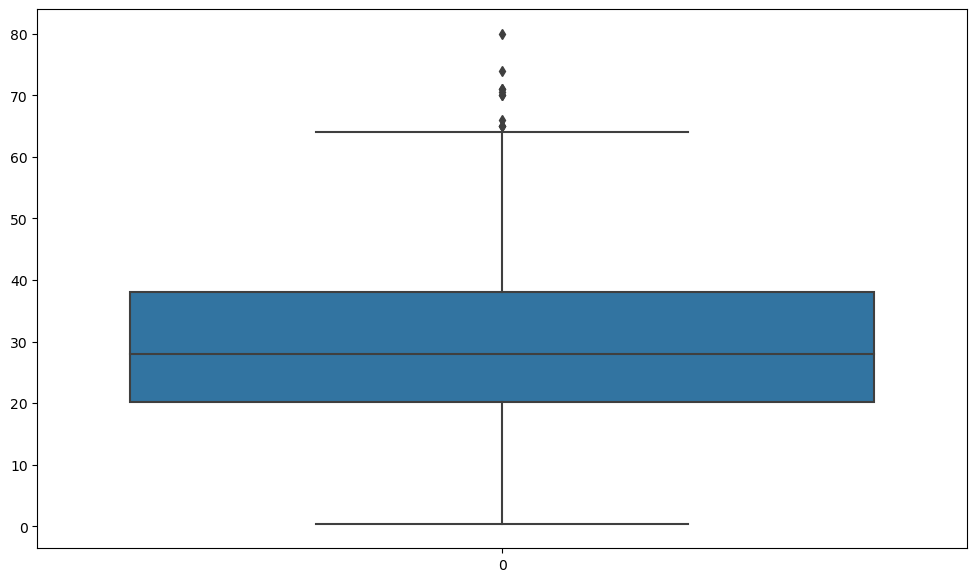

In [15]:
# Checking outlier in Age column

plt.figure(figsize = (12, 7))
sns.boxplot(data['Age'])

In [16]:
data['Age'].median()

28.0

In [17]:
data['Age_median'] = data['Age'].fillna(28.0)

In [18]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,14.0


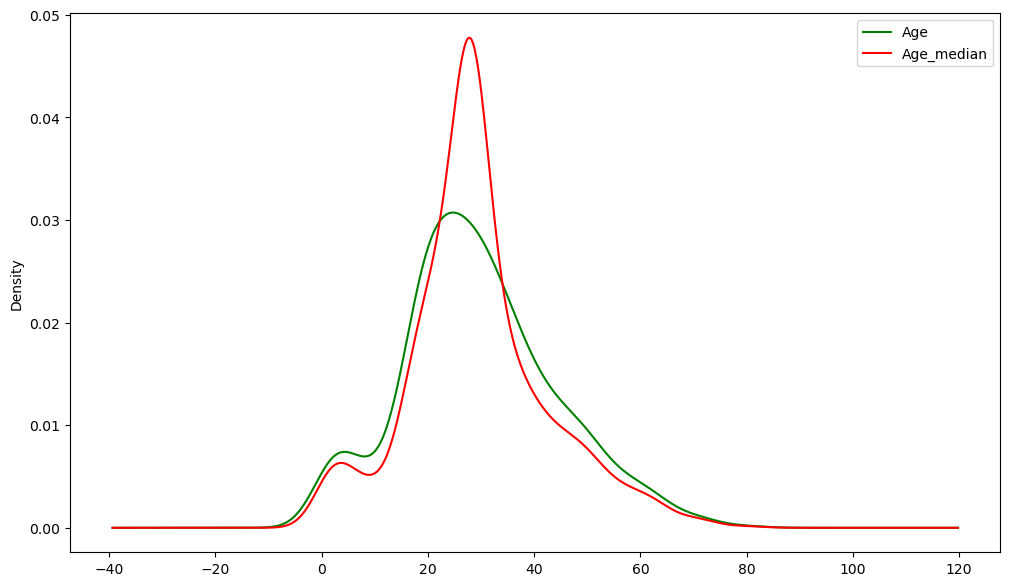

In [19]:
plt.figure(figsize = (12, 7))

data['Age'].plot(kind = 'kde', color = 'g')
data['Age_median'].plot(kind = 'kde', color = 'r')
plt.legend()

### Random Sample Imputation

In [20]:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [25]:
data['Age'].isnull().sum()

177

In [22]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
data['Age'].dropna().sample(data['Age'].isnull().sum(), random_state = 2)

471    38.0
542    11.0
719    33.0
137    37.0
654    18.0
       ... 
429    32.0
586    47.0
789    46.0
746    16.0
836    21.0
Name: Age, Length: 177, dtype: float64

In [24]:
random_sample = data['Age'].dropna().sample(data['Age'].isnull().sum(), random_state = 2)

In [25]:
len(random_sample)

177

In [26]:
random_sample.index = data[data['Age'].isnull()].index

In [27]:
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [28]:
data['Age_random'] = data['Age'].fillna(random_sample)

In [29]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,28.0,38.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,54.0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,2.0,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,27.0,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,14.0,14.0


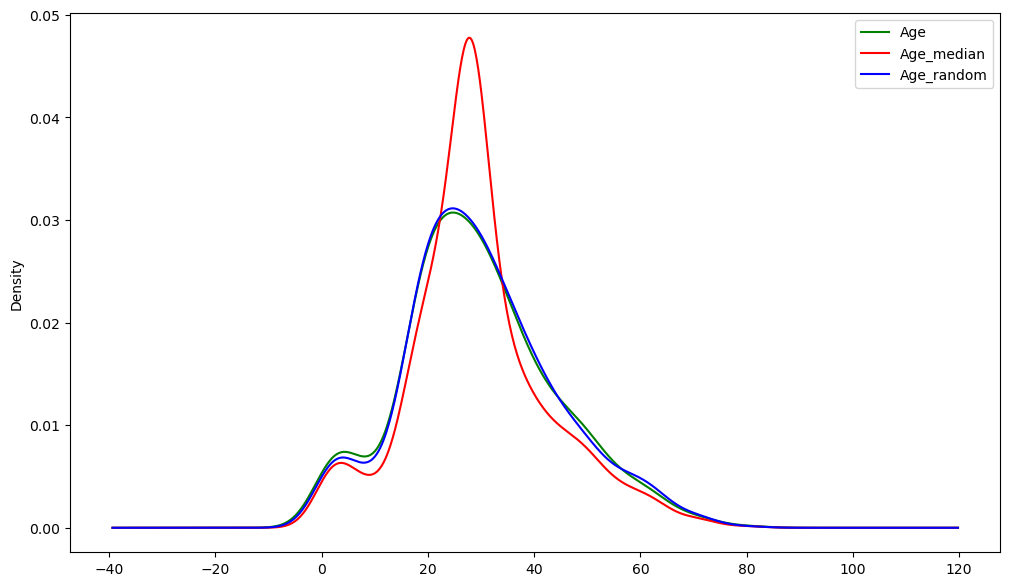

In [30]:
plt.figure(figsize = (12, 7))

data['Age'].plot(kind = 'kde', color = 'g')
data['Age_median'].plot(kind = 'kde', color = 'r')
data['Age_random'].plot(kind = 'kde', color = 'b')
plt.legend()

## Handling Categorical Data

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,35.0


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Data Preprocessing - Feature Engineering/train_data.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

data['Embarked'] = le.fit_transform(data['Embarked'])

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,35.0,35.0


In [33]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

### Ordinal Encoding

In [34]:
train['Property_Area'] = train['Property_Area'].replace({'Urban': 1, 'Rural': 3, 'Semiurban': 2})

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,1,1


In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,35.0,35.0


### One-Hot Encoding

In [34]:
encoded = pd.get_dummies(data['Sex'])
encoded

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [37]:
train = train.drop(['Gender'], axis = 1)

In [38]:
train = pd.concat([train, encoded], axis = 1)

In [39]:
train.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,1,1,0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,3,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,1,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,1,1,0,1


In [ ]:
#data.drop('Sex', axis = 1, inplace = True)
data.head()

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_y
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
3,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.742038
4,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.742038


## Feature Scaling

In [50]:
house = pd.read_csv('/content/drive/MyDrive/Data Preprocessing - Feature Engineering/Housing (1).csv')

In [51]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Standardization (Z-score scaling)
- It removes the mean and scales the data to unit variance.

z = (X - X.mean) / std

In [52]:
# We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [53]:
# fit data on Standard Scaler
ss = StandardScaler().fit(house[['area']])
house_copy = house.copy(deep=True)

In [54]:
# add the new created feature
house_copy['area_zscore'] = ss.transform(house_copy[['area']])
house_copy.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_zscore
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.046726
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.757010
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,2.218232
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1.083624
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1.046726


In [62]:
house_copy[['area']].mean()

area    5150.541284
dtype: float64

In [61]:
print(house_copy[['area_zscore']].mean())
print(house_copy[['area_zscore']].std())

area_zscore   -1.564498e-16
dtype: float64
area_zscore    1.000919
dtype: float64


### Normalization (Min-Max scaling)
- It transforms features by scaling each feature to a given range. Default to [0,1].

X_scaled = (X - X.min / (X.max - X.min)

In [63]:
# We use the min-max scaler from sklearn library
from sklearn.preprocessing import MinMaxScaler

In [64]:
# fit data on Min Max Scaler
mm = MinMaxScaler().fit(house[['area']])
#house_copy = house.copy(deep=True)

In [65]:
# add the new created feature
house_copy['area_norm'] = mm.transform(house_copy[['area']])
house_copy.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_norm
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.396564
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.502405
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.571134
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.402062
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.396564


In [68]:
house_copy[['area_norm']].max()

area_norm    1.0
dtype: float64

### Robust scaling
- It removes the median and scales the data according to the quantile range (defaults to IQR).

X_scaled = (X - X.median) / IQR

In [69]:
# We use the robust scaler from sklearn library
from sklearn.preprocessing import RobustScaler

In [70]:
# fit data on Min Max Scaler
rs = RobustScaler().fit(house[['area']])
house_copy = house.copy(deep=True)

In [71]:
# add the new created feature
house_copy['area_norm'] = rs.transform(house_copy[['area']])
house_copy.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_norm
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.021739
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1.579710
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1.942029
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1.050725
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1.021739


In [74]:
house_copy[['area_norm']].max()

area_norm    4.202899
dtype: float64

## Outlier Detection & Handling

In [80]:
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'Survived']

titanic = pd.read_csv('/content/drive/MyDrive/Data Preprocessing - Feature Engineering/titanic.csv', usecols=use_cols)

In [81]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


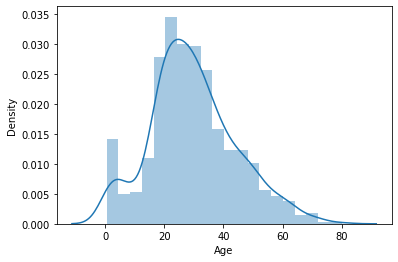

In [82]:
# Age Distribution
sns.distplot(titanic['Age'])

In [83]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

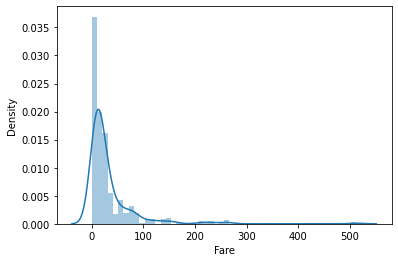

In [84]:
# Fare Distribution
sns.distplot(titanic['Fare'])

In [85]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

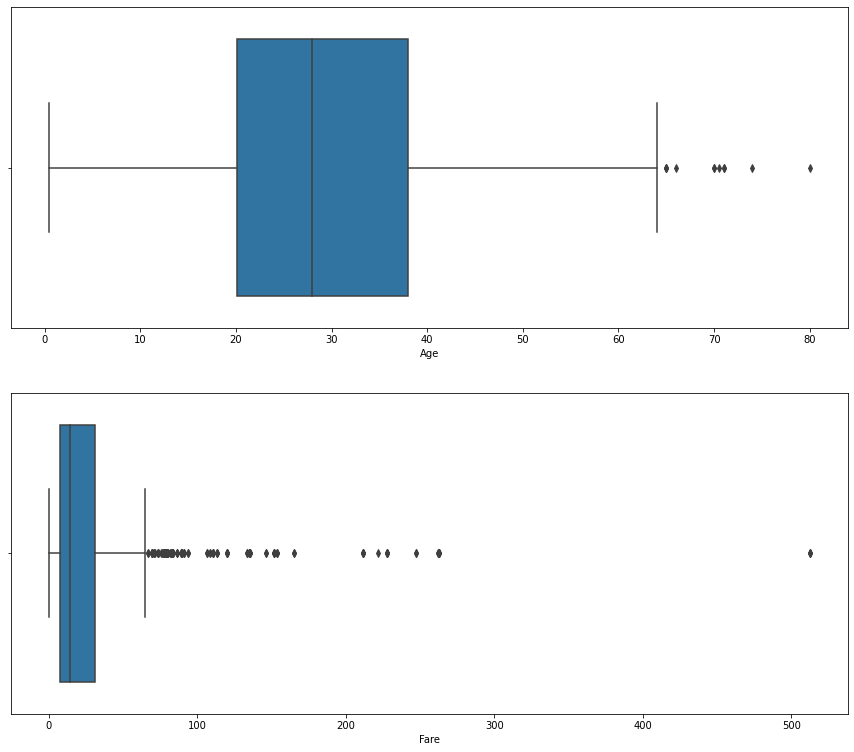

In [86]:
fig, axs = plt.subplots(2,1, figsize=(15, 13))

plt1 = sns.boxplot(titanic['Age'], ax = axs[0])
plt1 = sns.boxplot(titanic['Fare'], ax = axs[1])

plt.show()

In [87]:
# Detect an Outlier into Age Variable

upper_boundary = titanic['Age'].mean() + 3 * titanic['Age'].std()
lower_boundary = titanic['Age'].mean() - 3 * titanic['Age'].std()

upper_boundary, lower_boundary

(73.27860964406094, -13.880374349943303)

In [88]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

IQR, Q1, Q3

(23.0896, 7.9104, 31.0)

In [89]:
# Detect an Outlier into Fare Variable

upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

upper_bound, lower_bound

(100.2688, -61.358399999999996)

In [91]:
titanic[titanic['Fare'] > 100]

,Survived,Pclass,Sex,Age,Fare
27,0,1,male,19.00,263.0000
31,1,1,female,NaN,146.5208
88,1,1,female,23.00,263.0000
118,0,1,male,24.00,247.5208
195,1,1,female,58.00,146.5208
215,1,1,female,31.00,113.2750
258,1,1,female,35.00,512.3292
268,1,1,female,58.00,153.4625
269,1,1,female,35.00,135.6333
297,0,1,female,2.00,151.5500


In [92]:
ot_Fare = titanic[titanic['Fare'] > 100]

In [93]:
len(ot_Fare)

53

In [74]:
ot_Age = titanic[titanic['Age'] > 73]
len(ot_Age)

2

In [75]:
titanic = titanic[(titanic['Age'] <= upper_boundary) & (titanic['Age'] >= lower_boundary)]
titanic = titanic[(titanic['Fare'] <= upper_bound) & (titanic['Fare'] >= lower_bound)]

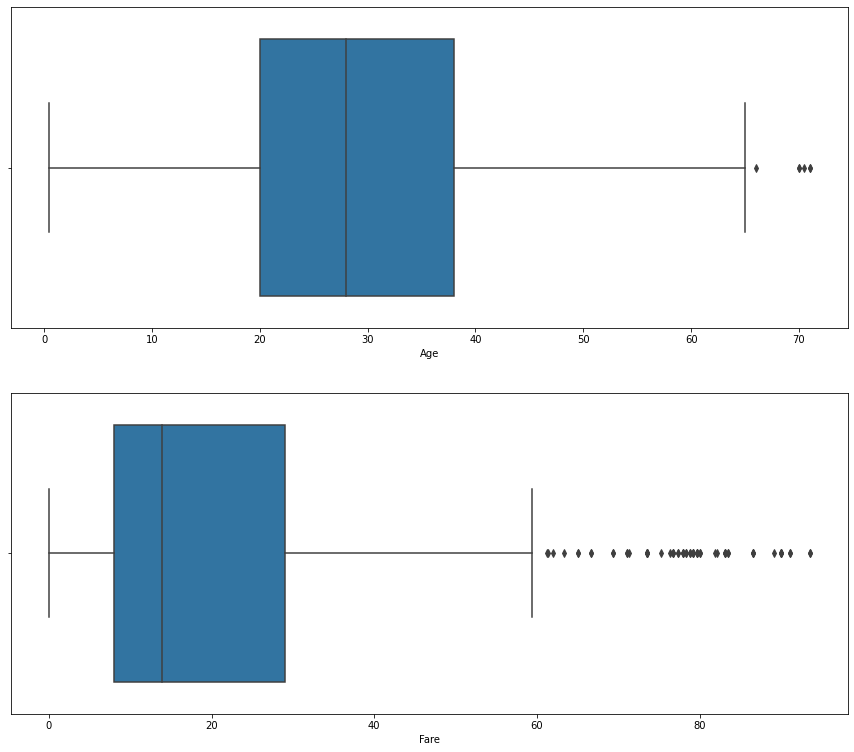

In [76]:
fig, axs = plt.subplots(2,1, figsize=(15, 13))

plt1 = sns.boxplot(titanic['Age'], ax = axs[0])
plt1 = sns.boxplot(titanic['Fare'], ax = axs[1])

plt.show()

## Feature Selection

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.

In [103]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [104]:
train.shape

(614, 13)

In [105]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

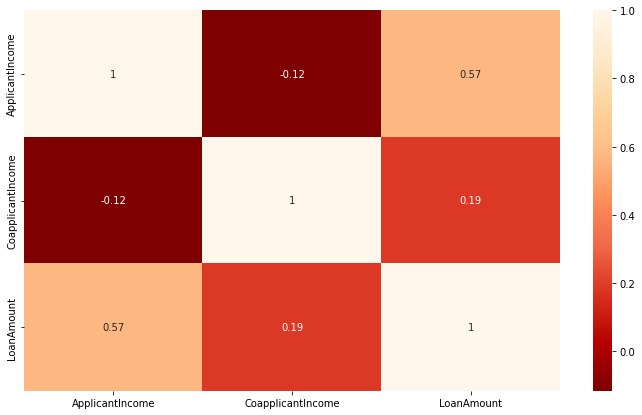

In [106]:
# Analyzing the relation between Numerical Variables

num_features = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

plt.figure(figsize = (12, 7))
cor = num_features.corr()
sns.heatmap(cor, annot = True, cmap = 'OrRd_r')
plt.show()

### Feature Selection using Chi-square Test

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status']
for i in cols:
  train[i] =le.fit_transform(train[i])

In [108]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [113]:
train['Credit_History'].mode()

0    1.0
dtype: float64

In [114]:
train['Credit_History'] = train['Credit_History'].fillna(1)

In [115]:
train['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [116]:
# Split the features and target variable

x = train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']]
y = train['Loan_Status']

In [118]:
from sklearn.feature_selection import chi2

score = chi2(x, y)
score[1]

array([9.21077736e-01, 1.52491995e-01, 8.24894754e-01, 5.98873168e-02,
       7.67688360e-01, 5.38762867e-01, 3.40379591e-07])

In [119]:
p_values = pd.Series(score[1], index = x.columns)
p_values

Gender            9.210777e-01
Married           1.524920e-01
Dependents        8.248948e-01
Education         5.988732e-02
Self_Employed     7.676884e-01
Property_Area     5.387629e-01
Credit_History    3.403796e-07
dtype: float64

In [122]:
irr_features = []

for x in p_values.index:
  if p_values[x] <= 0.05:
    print(x, ' :- Reject the Null Hypothesis')
  else:
    print(x, ' :- Accept the Null Hypothesis')
    irr_features.append(x)

Gender  :- Accept the Null Hypothesis
Married  :- Accept the Null Hypothesis
Dependents  :- Accept the Null Hypothesis
Education  :- Accept the Null Hypothesis
Self_Employed  :- Accept the Null Hypothesis
Property_Area  :- Accept the Null Hypothesis
Credit_History  :- Reject the Null Hypothesis


### Chi-Square Test (Test for Independence)

 1.  Null hypothesis : Variables (Features) are independent to each other.
 2. Alternate Hypothesis : Variables (Features) are dependent to each other.

 ***If p-value is >= 0.05, then we can reject the Null Hypothesis or else we should accept it.***

In [123]:
irr_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [124]:
train = train.drop(irr_features, axis = 1)

In [125]:
train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,5849,0.0,NaN,360.0,1.0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1


In [126]:
train.shape

(614, 7)